In [1]:
from custom.datasets import Meiosis_Dataset
from custom.models import Net_Period_Classification
from custom.utils import accuracy, weight_balance, random_sample
import torch
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import ConcatDataset, DataLoader
from torch import optim
import numpy as np
from itertools import chain

In [2]:
# dataset = Meiosis_Dataset(path='../SC_figures', label={'leptotene', 'zygotene', 'pachytene_ab', 'pachytene_n'}, target=[0,0,0,0])

In [3]:
dataset_1 = Meiosis_Dataset(path='../SC_figures', label='zygotene', target=0)
indicies_1, indicies_2 = random_sample(len(dataset_1), .9)
dataset_1_t = Meiosis_Dataset(path='../SC_figures', label='zygotene', target=0)
dataset_1_t.im_paths = [dataset_1_t.im_paths[index] for index in indicies_1]
dataset_1_v = Meiosis_Dataset(path='../SC_figures', label='zygotene', target=0)
dataset_1_v.im_paths = [dataset_1_v.im_paths[index] for index in indicies_2]

dataset_2 = Meiosis_Dataset(path='../SC_figures', label='pachytene_ab', target=1)
indicies_1, indicies_2 = random_sample(len(dataset_2), .9)
dataset_2_t = Meiosis_Dataset(path='../SC_figures', label='pachytene_ab', target=1)
dataset_2_t.im_paths = [dataset_2_t.im_paths[index] for index in indicies_1]
dataset_2_v = Meiosis_Dataset(path='../SC_figures', label='pachytene_ab', target=1)
dataset_2_v.im_paths = [dataset_2_v.im_paths[index] for index in indicies_2]

dataset_3 = Meiosis_Dataset(path='../SC_figures', label='pachytene_n', target=1)
indicies_1, indicies_2 = random_sample(len(dataset_3), .9)
dataset_3_t = Meiosis_Dataset(path='../SC_figures', label='pachytene_n', target=1)
dataset_3_t.im_paths = [dataset_3_t.im_paths[index] for index in indicies_1]
dataset_3_v = Meiosis_Dataset(path='../SC_figures', label='pachytene_n', target=1)
dataset_3_v.im_paths = [dataset_3_v.im_paths[index] for index in indicies_2]

dataset_4 = Meiosis_Dataset(path='../SC_figures', label='leptotene', target=2)
indicies_1, indicies_2 = random_sample(len(dataset_4), .9)
dataset_4_t = Meiosis_Dataset(path='../SC_figures', label='leptotene', target=2)
dataset_4_t.im_paths = [dataset_4_t.im_paths[index] for index in indicies_1]
dataset_4_v = Meiosis_Dataset(path='../SC_figures', label='leptotene', target=2)
dataset_4_v.im_paths = [dataset_4_v.im_paths[index] for index in indicies_2]

dataset_t = ConcatDataset([dataset_1_t, 
                           dataset_2_t, 
                           dataset_3_t,
                           dataset_4_t])
train_loader = DataLoader(dataset_t, batch_size=64, shuffle=True)

dataset_v = ConcatDataset([dataset_1_v, 
                           dataset_2_v, 
                           dataset_3_v,
                           dataset_4_v])
val_loader = DataLoader(dataset_v, batch_size=8)

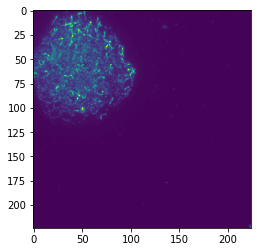

In [9]:
im, _ = dataset_4[40]
import matplotlib.pyplot as plt
plt.imshow(im.squeeze())
plt.show()

In [4]:
print(len(dataset_1), len(dataset_2), len(dataset_3), len(dataset_4), len(dataset_t))
weights = weight_balance([len(dataset_1),
                          len(dataset_2)+
                          len(dataset_3),
                          len(dataset_4)])
weights = torch.FloatTensor(weights)
weights[2] = weights[2] / 4.
print(weights)

487 377 627 46 1387

 1.0520
 0.5103
 2.7844
[torch.FloatTensor of size 3]



In [5]:
state_dict = torch.load('./models/period_classification_4_with_ab')

In [6]:
model = Net_Period_Classification(3)
model.cuda()

Net_Period_Classification(
  (conv1a): conv_bn(
    (conv): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2), dilation=(2, 2))
    (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True)
  )
  (drop1a): Dropout2d(p=0.2, inplace)
  (conv1b): conv_bn(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2), dilation=(2, 2))
    (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True)
  )
  (drop1b): Dropout2d(p=0.2, inplace)
  (conv2): inception_v2(
    (conv3a): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
    (conv3b): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv5a): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
    (conv5b): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv5c): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv7a): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
    (conv7b): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(

In [7]:
'''
model.conv1a.load_state_dict(state_dict, False)
model.conv1b.load_state_dict(state_dict, False)
model.conv2.load_state_dict(state_dict, False)
model.conv3.load_state_dict(state_dict, False)
model.conv4.load_state_dict(state_dict, False)
model.conv5.load_state_dict(state_dict, False)
para_to_update = chain(model.mlp1.parameters(), model.mlp2.parameters(), model.mlp3.parameters(), model.mlp4.parameters(), model.mlp5.parameters())
'''

# model.load_state_dict(state_dict)

'\nmodel.conv1a.load_state_dict(state_dict, False)\nmodel.conv1b.load_state_dict(state_dict, False)\nmodel.conv2.load_state_dict(state_dict, False)\nmodel.conv3.load_state_dict(state_dict, False)\nmodel.conv4.load_state_dict(state_dict, False)\nmodel.conv5.load_state_dict(state_dict, False)\npara_to_update = chain(model.mlp1.parameters(), model.mlp2.parameters(), model.mlp3.parameters(), model.mlp4.parameters(), model.mlp5.parameters())\n'

In [8]:
para_to_update = model.parameters()
optimizer = optim.Adam(para_to_update, lr=1e-3)
# optimizer = optim.SGD(model.parameters(), lr=1e-4, momentum=0.9)

In [9]:
loss_func = F.cross_entropy

In [10]:
def proba_to_label(output):
    # output in shape (nb, n_class)
    label = np.argmax(output, axis=1)
    return label

In [11]:
def train(epoch):
    model.train()
    train_loss = 0
    acc = 0
    labels = []
    targets = []
    for batch_idx, (im, target) in enumerate(train_loader):
        targets.append(target.numpy().squeeze())
        input, target, weight = Variable(im).cuda(0), Variable(target.squeeze_()).cuda(0), Variable(weights).cuda(0)
        optimizer.zero_grad()
        output, _ = model(input)
        loss = loss_func(output, target, weight)
        loss.backward()
        acc += accuracy(output, target).data[0]
        train_loss += loss.data.sum() / loss.data.size(0)
        optimizer.step()
        labels.append(proba_to_label(output.data.cpu().numpy())) 
    
    print('====> Epoch: {}t Average loss: {:.4f} Average acc: {:.3f}'.format(
          epoch, train_loss / len(train_loader), acc / len(train_loader)))
    labels = np.hstack(labels)
    targets = np.hstack(targets)
    return labels, targets

In [12]:
from torchvision.utils import save_image
from torch.nn.functional import threshold
def test(epoch):
    model.eval()
    test_loss = 0
    acc = 0
    labels = []
    targets = []
    for i, (im, target) in enumerate(val_loader):
        targets.append(target.numpy().squeeze())
        input, target, weight = Variable(im).cuda(0), Variable(target.squeeze_()).cuda(0), Variable(weights).cuda(0)
        output, _ = model(input)
        loss = loss_func(output, target, weight)
        acc += accuracy(output, target).data[0]
        test_loss += loss.data.sum() / loss.data.size(0)
        labels.append(proba_to_label(output.data.cpu().numpy())) 
        
    print('====> Epoch: {}v Average loss: {:.4f} Average acc: {:.3f}'.format(
          epoch, test_loss / len(val_loader), acc / len(val_loader)))
    labels = np.hstack(labels)
    targets = np.hstack(targets)
    return labels, targets

In [13]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(target, label,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # Compute confusion matrix
    cm = confusion_matrix(target, label)
    np.set_printoptions(precision=2)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #tick_marks = np.arange(len(classes))
    #plt.xticks(tick_marks, classes, rotation=45)
    #plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



====> Epoch: 0t Average loss: 0.9325 Average acc: 0.540


/usr/local/anaconda3/lib/python3.6/site-packages/skimage/morphology/misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


====> Epoch: 0v Average loss: 1.1112 Average acc: 0.257
Normalized confusion matrix


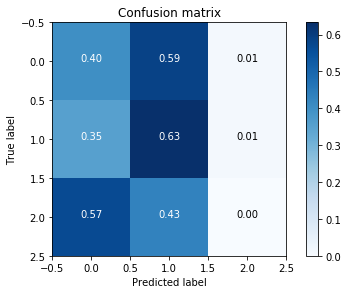

Normalized confusion matrix


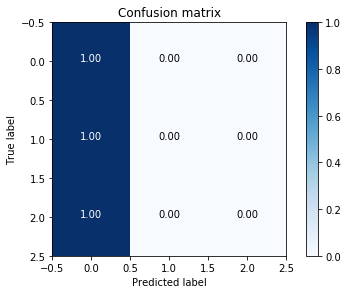

====> Epoch: 1t Average loss: 0.9028 Average acc: 0.546
====> Epoch: 1v Average loss: 1.2795 Average acc: 0.257
====> Epoch: 2t Average loss: 0.8919 Average acc: 0.547
====> Epoch: 2v Average loss: 0.9550 Average acc: 0.491
====> Epoch: 3t Average loss: 0.8821 Average acc: 0.586
====> Epoch: 3v Average loss: 0.9793 Average acc: 0.379
====> Epoch: 4t Average loss: 0.8680 Average acc: 0.565
====> Epoch: 4v Average loss: 0.7503 Average acc: 0.706
====> Epoch: 5t Average loss: 0.8244 Average acc: 0.598
====> Epoch: 5v Average loss: 0.9564 Average acc: 0.406
====> Epoch: 6t Average loss: 0.8700 Average acc: 0.570
====> Epoch: 6v Average loss: 0.7837 Average acc: 0.577
====> Epoch: 7t Average loss: 0.8395 Average acc: 0.586
====> Epoch: 7v Average loss: 0.7623 Average acc: 0.557
====> Epoch: 8t Average loss: 0.8370 Average acc: 0.599
====> Epoch: 8v Average loss: 0.7600 Average acc: 0.592
====> Epoch: 9t Average loss: 0.8032 Average acc: 0.622
====> Epoch: 9v Average loss: 0.8344 Average acc

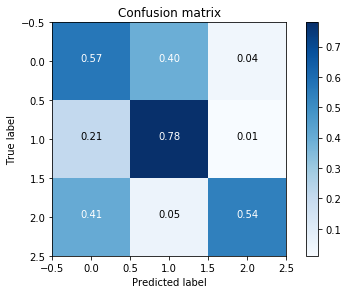

Normalized confusion matrix


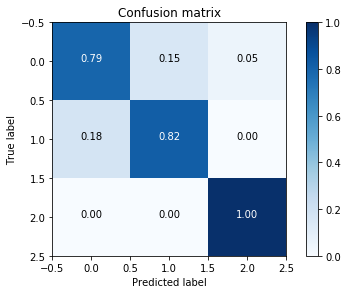

====> Epoch: 26t Average loss: 0.6814 Average acc: 0.696
====> Epoch: 26v Average loss: 0.5981 Average acc: 0.711
====> Epoch: 27t Average loss: 0.6875 Average acc: 0.716
====> Epoch: 27v Average loss: 0.4297 Average acc: 0.855
====> Epoch: 28t Average loss: 0.6723 Average acc: 0.711
====> Epoch: 28v Average loss: 0.4867 Average acc: 0.796
====> Epoch: 29t Average loss: 0.6834 Average acc: 0.705
====> Epoch: 29v Average loss: 0.4313 Average acc: 0.857
====> Epoch: 30t Average loss: 0.6701 Average acc: 0.715
====> Epoch: 30v Average loss: 0.5756 Average acc: 0.730
====> Epoch: 31t Average loss: 0.6882 Average acc: 0.672
====> Epoch: 31v Average loss: 0.5235 Average acc: 0.770
====> Epoch: 32t Average loss: 0.6526 Average acc: 0.704
====> Epoch: 32v Average loss: 0.5476 Average acc: 0.711
====> Epoch: 33t Average loss: 0.6640 Average acc: 0.690
====> Epoch: 33v Average loss: 0.5467 Average acc: 0.800
====> Epoch: 34t Average loss: 0.6734 Average acc: 0.728
====> Epoch: 34v Average loss: 

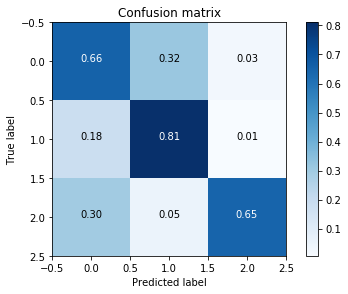

Normalized confusion matrix


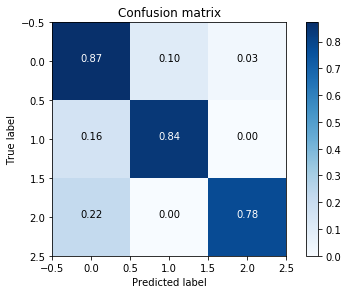

====> Epoch: 51t Average loss: 0.5958 Average acc: 0.733
====> Epoch: 51v Average loss: 0.4787 Average acc: 0.851
====> Epoch: 52t Average loss: 0.6119 Average acc: 0.747
====> Epoch: 52v Average loss: 0.4763 Average acc: 0.814
====> Epoch: 53t Average loss: 0.5646 Average acc: 0.765
====> Epoch: 53v Average loss: 0.4728 Average acc: 0.811
====> Epoch: 54t Average loss: 0.5910 Average acc: 0.752
====> Epoch: 54v Average loss: 0.4500 Average acc: 0.862
====> Epoch: 55t Average loss: 0.5803 Average acc: 0.756
====> Epoch: 55v Average loss: 0.4440 Average acc: 0.833
====> Epoch: 56t Average loss: 0.6108 Average acc: 0.744
====> Epoch: 56v Average loss: 0.4481 Average acc: 0.829
====> Epoch: 57t Average loss: 0.5857 Average acc: 0.738
====> Epoch: 57v Average loss: 0.5384 Average acc: 0.794
====> Epoch: 58t Average loss: 0.6016 Average acc: 0.742
====> Epoch: 58v Average loss: 0.4119 Average acc: 0.868
====> Epoch: 59t Average loss: 0.5771 Average acc: 0.749
====> Epoch: 59v Average loss: 

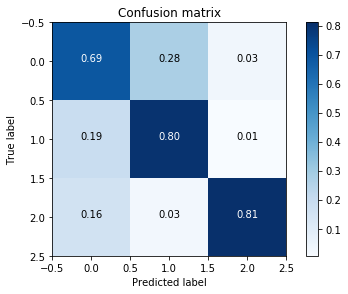

Normalized confusion matrix


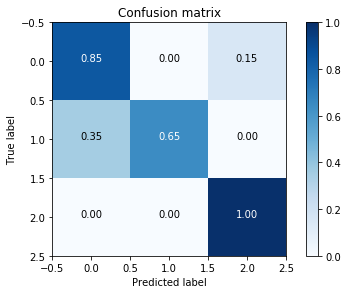

====> Epoch: 76t Average loss: 0.5863 Average acc: 0.748
====> Epoch: 76v Average loss: 0.4856 Average acc: 0.794
====> Epoch: 77t Average loss: 0.5556 Average acc: 0.760
====> Epoch: 77v Average loss: 0.4781 Average acc: 0.827
====> Epoch: 78t Average loss: 0.5710 Average acc: 0.762
====> Epoch: 78v Average loss: 0.5313 Average acc: 0.765
====> Epoch: 79t Average loss: 0.5661 Average acc: 0.747
====> Epoch: 79v Average loss: 0.4094 Average acc: 0.857
====> Epoch: 80t Average loss: 0.5567 Average acc: 0.765
====> Epoch: 80v Average loss: 0.5684 Average acc: 0.759
====> Epoch: 81t Average loss: 0.5430 Average acc: 0.766
====> Epoch: 81v Average loss: 0.4110 Average acc: 0.868
====> Epoch: 82t Average loss: 0.5521 Average acc: 0.764
====> Epoch: 82v Average loss: 0.4320 Average acc: 0.855
====> Epoch: 83t Average loss: 0.5516 Average acc: 0.756
====> Epoch: 83v Average loss: 0.6377 Average acc: 0.748
====> Epoch: 84t Average loss: 0.5250 Average acc: 0.774
====> Epoch: 84v Average loss: 

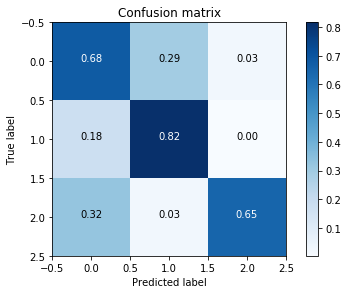

Normalized confusion matrix


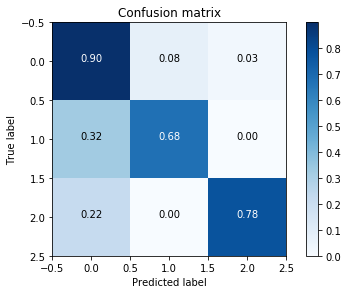

In [14]:
for epoch in range(101):
    labels_t, targets_t = train(epoch)
    labels_v, targets_v = test(epoch)
    if epoch % 25 == 0: 
        plot_confusion_matrix(targets_t, labels_t, True)
        plot_confusion_matrix(targets_v, labels_v, True)

In [15]:
torch.save(model.state_dict(), './models/period_classification_5_period_sparse')